# Training a Fruit Classifer using a CNN

Source: https://github.com/antonnifo/fruits-360/blob/master/Fruit%20Classifer.ipynb

In [2]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

num_classes = 24
img_rows, img_cols = 100, 100
batch_size = 16

import warnings
warnings.filterwarnings('ignore')

Training_data sind die Training Daten. Hingegen die Test Daten hier als validation_data gekennzeichnet sind.
Hintergrund ist das beim $model.fit()$ sonst eine Fehlermeldung kommt, da es $validation$ als Übergabeparameter haben will.

In [3]:
train_data_dir = 'frutis_360/fruits-360-original-size/fruits-360-original-size/Training'
validation_data_dir = 'frutis_360/fruits-360-original-size/fruits-360-original-size/Test'

In [9]:
# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)

print("Training: ")
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size =batch_size,
        class_mode='categorical',
        shuffle=True)

print("Test: ") 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Training: 
Found 6231 images belonging to 24 classes.
Test: 
Found 3110 images belonging to 24 classes.


## Definition of the model

In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Print the model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 activation (Activation)     (None, 100, 100, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                        

In [6]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("fruits_fresh_cnn_1.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop, checkpoint, reduce_lr]

# Aktualisieren Sie den Optimizer-Parameter
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

nb_train_samples = 6231
nb_validation_samples = 3110
epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)


Epoch 1/10


2024-01-20 18:32:16.876945: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-01-20 18:32:16.893706: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


389/389 [==============================] - ETA: 0s - loss: 2.1076 - accuracy: 0.3282

2024-01-20 18:33:19.749379: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



Epoch 1: val_loss improved from inf to 0.64712, saving model to fruits_fresh_cnn_1.h5
389/389 [==============================] - 71s 183ms/step - loss: 2.1076 - accuracy: 0.3282 - val_loss: 0.6471 - val_accuracy: 0.7510 - lr: 0.0010
Epoch 2/10
389/389 [==============================] - ETA: 0s - loss: 0.9608 - accuracy: 0.6697
Epoch 2: val_loss improved from 0.64712 to 0.60584, saving model to fruits_fresh_cnn_1.h5
389/389 [==============================] - 68s 174ms/step - loss: 0.9608 - accuracy: 0.6697 - val_loss: 0.6058 - val_accuracy: 0.8212 - lr: 0.0010
Epoch 3/10
389/389 [==============================] - ETA: 0s - loss: 0.6399 - accuracy: 0.7902
Epoch 3: val_loss did not improve from 0.60584
389/389 [==============================] - 69s 176ms/step - loss: 0.6399 - accuracy: 0.7902 - val_loss: 1.6050 - val_accuracy: 0.6421 - lr: 0.0010
Epoch 4/10
389/389 [==============================] - ETA: 0s - loss: 0.5098 - accuracy: 0.8298
Epoch 4: val_loss improved from 0.60584 to 0.22

## Displaying the confusion matrix

In [10]:
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

2024-01-20 18:58:04.875648: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Confusion Matrix
[[157   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 160   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 159   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 153   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 154   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 156   2   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 159   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   1   0   0]
 [  0   0   0   0   0   0   0 234   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   2   0   0   0   0   0 154   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 154   0   0   0   0   0   0   0   0


2024-01-20 19:10:52.186583: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


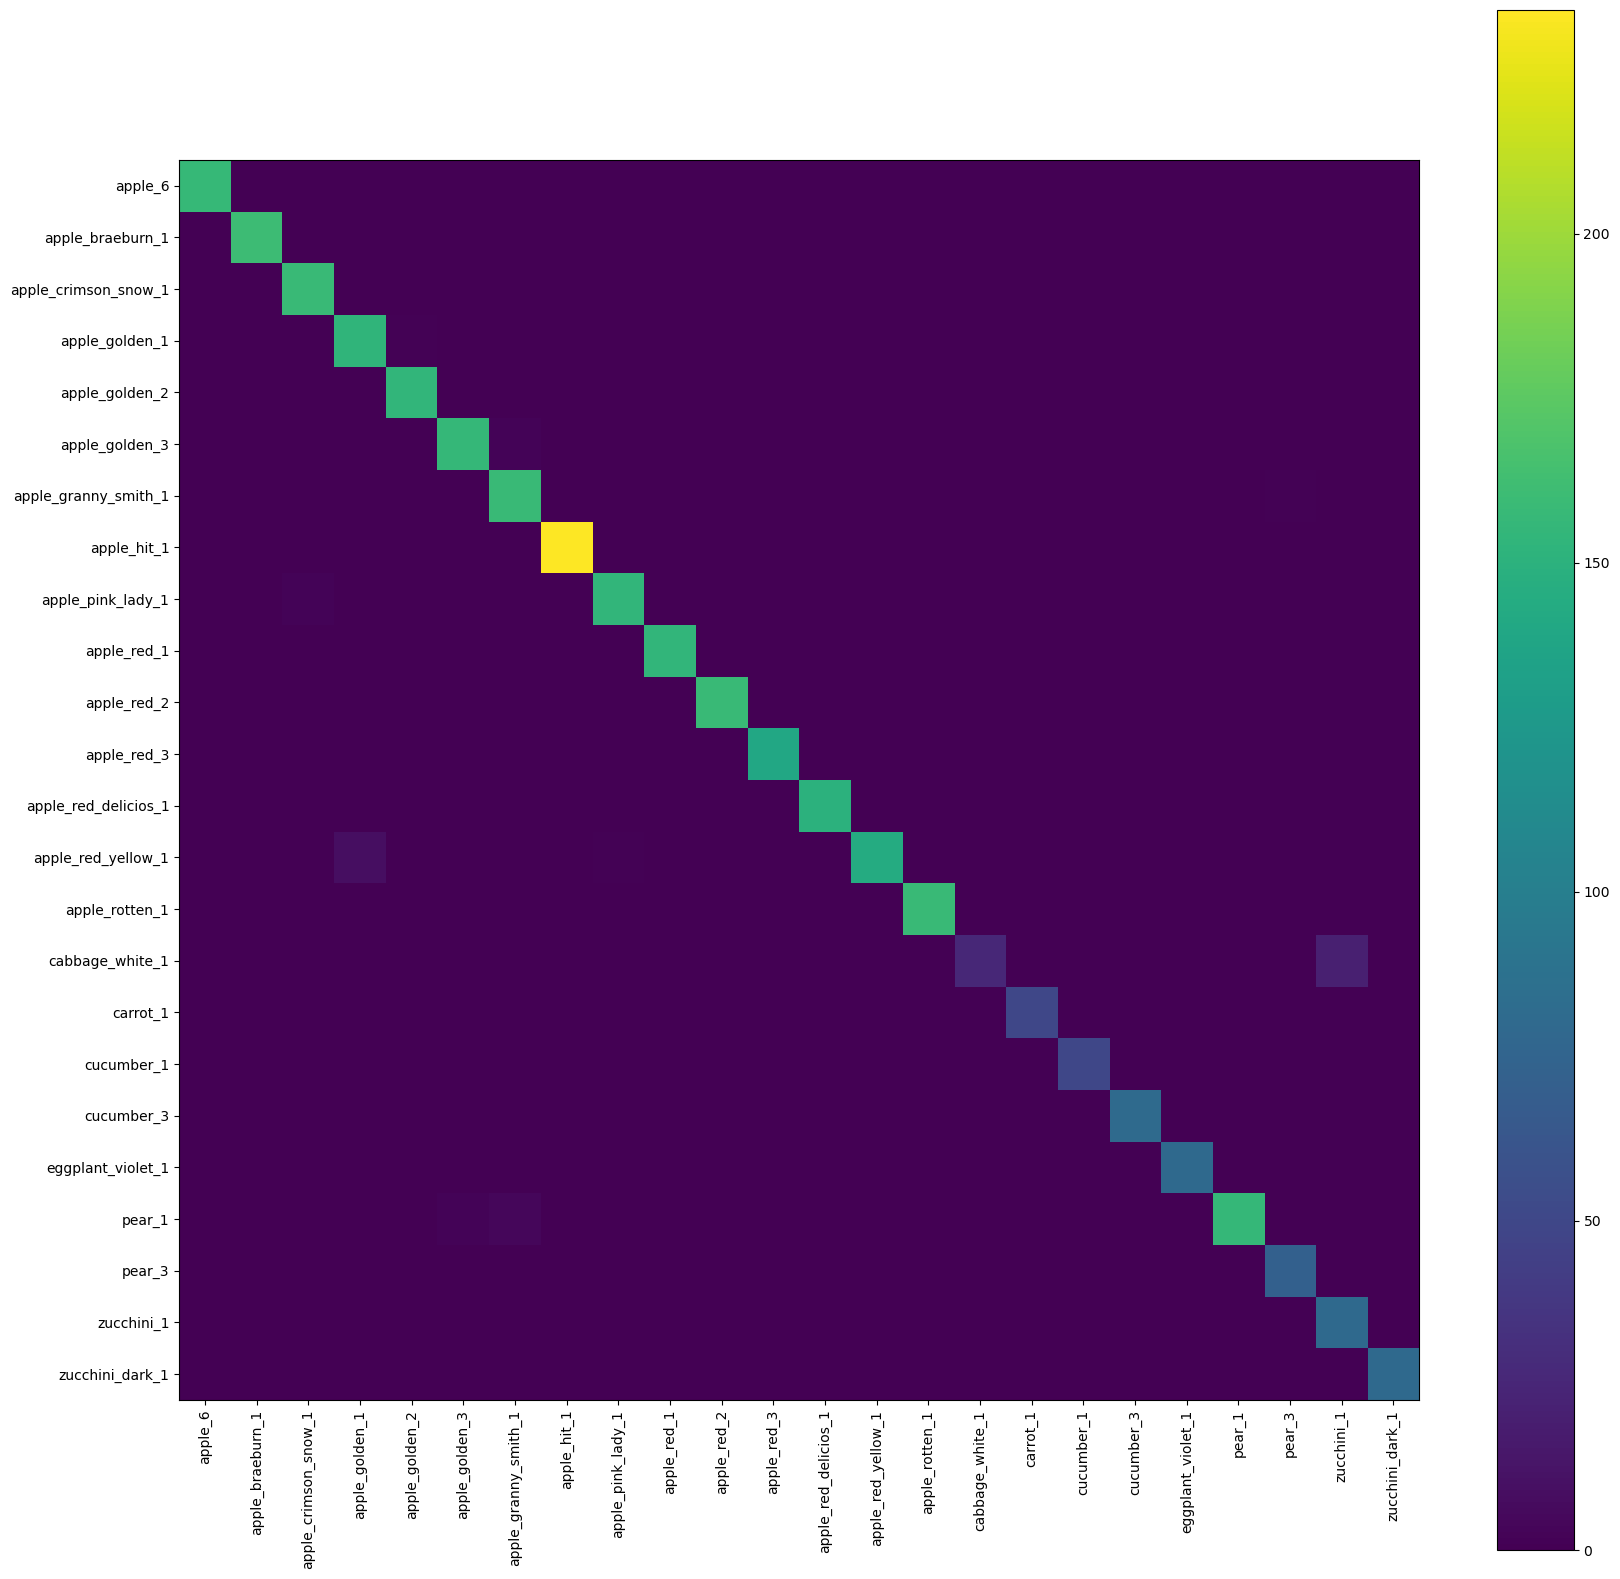

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model

img_row, img_height = 100,100
model = load_model('fruits_fresh_cnn_1.h5')


#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)